In [1]:
# import data manipulation library
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data\\mushrooms-full-dataset.csv')

In [3]:
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# import sklearn library
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data['poisonous'].value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

In [7]:
data.isnull().sum()

poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
x = data.drop('poisonous', axis=1)
y = data['poisonous']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=365, stratify=y)

In [10]:
enc_x = OrdinalEncoder()
enc_y = LabelEncoder()

In [11]:
x_train_trans = enc_x.fit_transform(x_train)
x_test_trans = enc_x.transform(x_test)
y_train_trans = enc_y.fit_transform(y_train)
y_test_trans = enc_y.transform(y_test)

In [12]:
scale = MinMaxScaler(feature_range=(-1,1)).fit(x_train_trans)
x_train_scale = scale.transform(x_train_trans)

In [13]:
svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(x_train_scale, y_train_trans)

SVC(kernel='linear')

In [14]:
y_pred = svc.predict(scale.transform(x_test_trans))

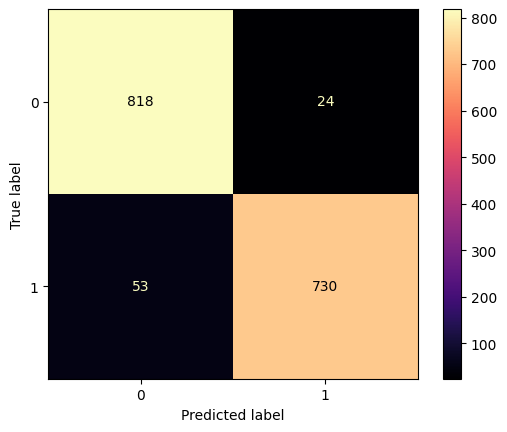

In [15]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test_trans, y_pred=y_pred, cmap='magma')

In [16]:
print(classification_report(y_test_trans, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.94      0.97      0.96       842
   poisonous       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

